In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from imblearn.over_sampling import RandomOverSampler


In [106]:
data=pd.read_csv('Housing.csv')

In [107]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [109]:
data['mainroad'].unique()


array(['yes', 'no'], dtype=object)

In [110]:
data['guestroom'].unique()


array(['no', 'yes'], dtype=object)

In [111]:
data['basement'].unique()

array(['no', 'yes'], dtype=object)

In [112]:
data['hotwaterheating'].unique()

array(['no', 'yes'], dtype=object)

In [113]:
data['airconditioning'].unique()

array(['yes', 'no'], dtype=object)

In [114]:
data['prefarea'].unique()

array(['yes', 'no'], dtype=object)

In [115]:
data['furnishingstatus'].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


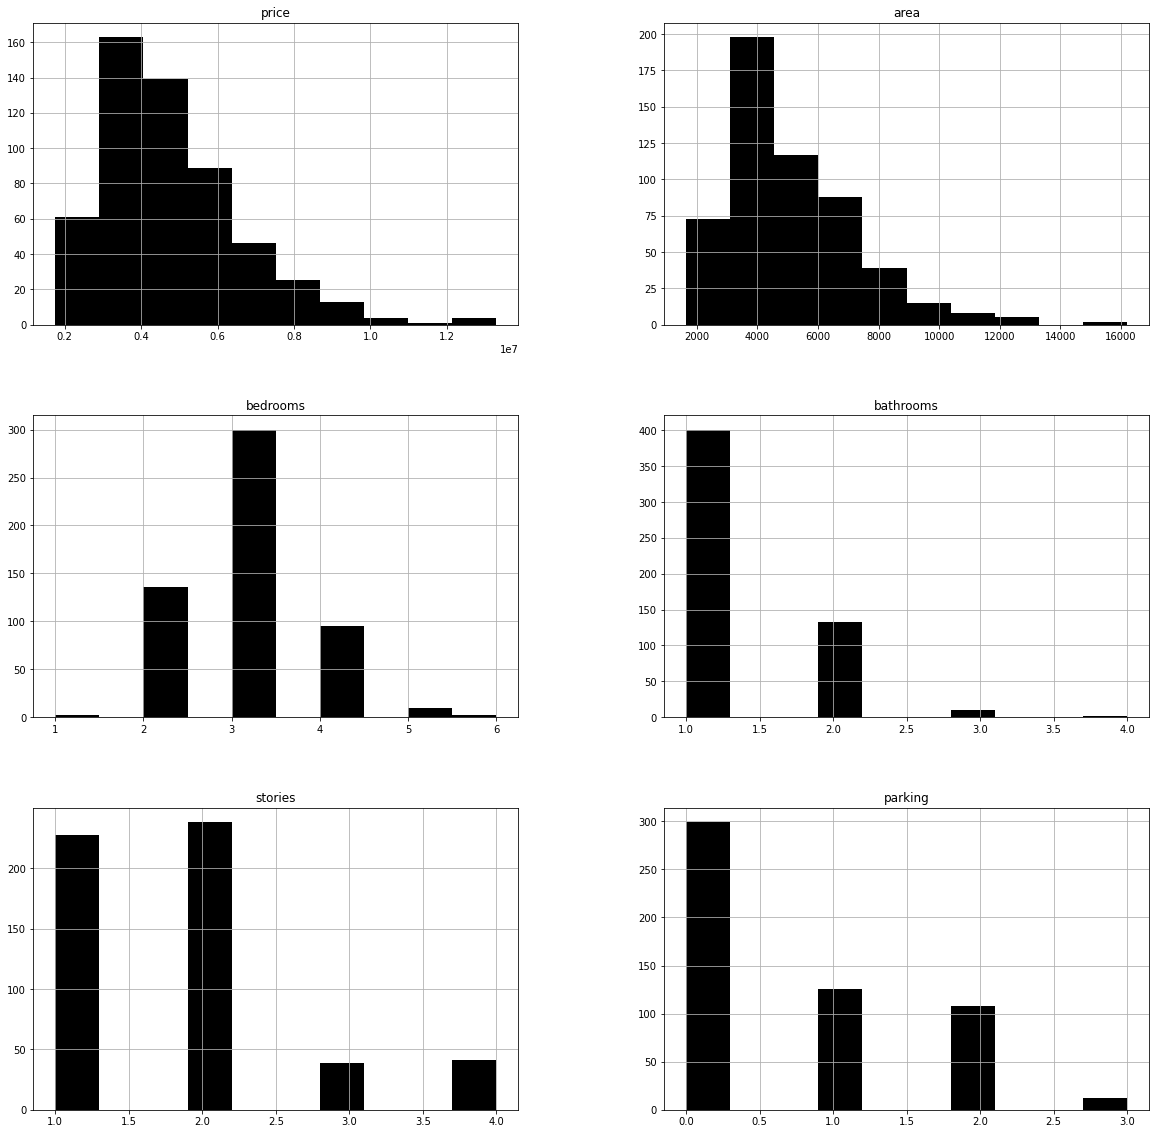

In [118]:
data.hist(figsize=(20,20),color='black')
plt.show()

In [119]:
median = data["area"].median()
std = data["area"].std()
outliers = (data["area"] - median).abs() > std
data["area"][outliers] = np.nan
data["area"].fillna(median, inplace=True)

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'area'}>],
       [<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'stories'}>,
        <Axes: title={'center': 'parking'}>]], dtype=object)

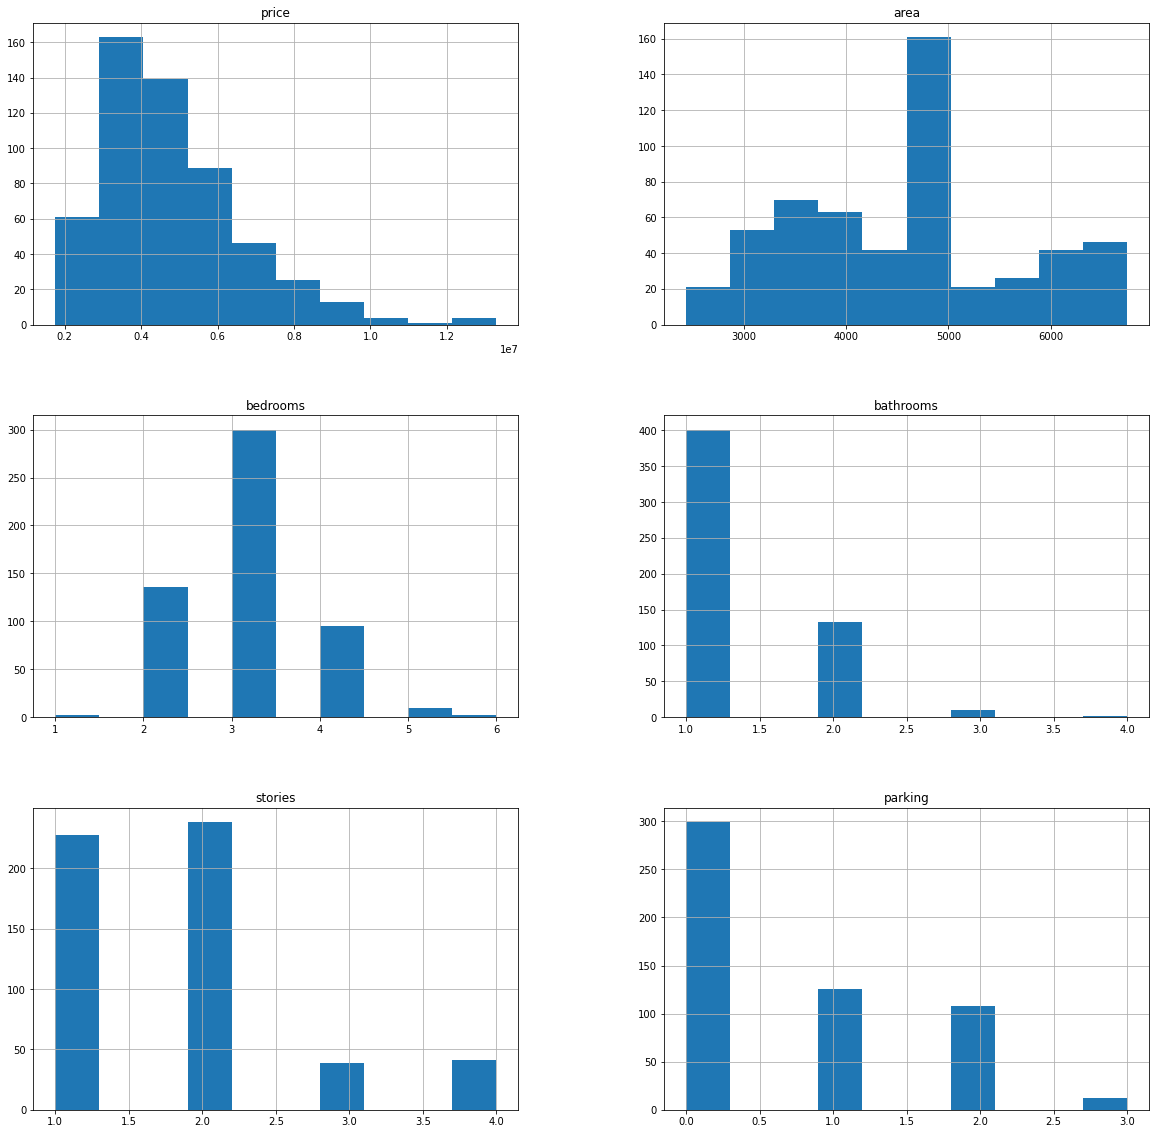

In [120]:
data.hist(figsize=(20,20))

In [121]:
data.corr()['price'].sort_values()

bedrooms    0.37
parking     0.38
stories     0.42
area        0.43
bathrooms   0.52
price       1.00
Name: price, dtype: float64

In [122]:
data=data.drop(['hotwaterheating','furnishingstatus'],axis=1)

In [123]:
y=data['price']
x=data.drop('price',axis=1)

In [124]:
ros = RandomOverSampler(sampling_strategy='auto', random_state=42)
x, y = ros.fit_resample(x, y)

In [125]:
for i in x.columns:
    if x[i].dtypes=="object":
        le=LabelEncoder()
        x[i]=le.fit_transform(x[i])

In [126]:
xtr,xte,ytr,yte=train_test_split(x,y,test_size=0.33)

In [128]:
rf=RandomForestRegressor().fit(xtr,ytr)
print("test score",rf.score(xte,yte)*100)
print("train score",rf.score(xtr,ytr)*100)
pred=model.predict(xte)
rmse = sqrt(mean_squared_error(yte, pred))
print("rmse",rmse)
print("mse",mean_squared_error(yte, pred))


test score 98.9274109211345
train score 99.31964923022835
rmse 1298309.3802064469
mse 1685607246732.0483


In [129]:
dt=DecisionTreeRegressor().fit(xtr,ytr)
print("train score",dt.score(xtr,ytr)*100)
print("test score",dt.score(xte,yte)*100)
pred=model.predict(xte)
rmse = sqrt(mean_squared_error(yte, pred))
print("rmse",rmse)
print("mse",mean_squared_error(yte, pred))

train score 99.50320518962685
test score 98.20324462375896
rmse 1298309.3802064469
mse 1685607246732.0483
